In [135]:
import numpy as np
from deepsetstats.utils import videocapture as vc
from deepsetstats.utils import constants as c
from pathlib import Path
import cv2
import math
from matplotlib import pyplot as plt
import matplotlib as mpl

In [132]:
%matplotlib inline

In [19]:
# Dictionary of vids
extension = ".mp4"
gs = ["wb", "rg", "ao", "us"]

c.PATH_VIDS = "/Users/davidamat/Documents/BackUp/DeepSetStats"
d_path_vids = {vid: str(Path(c.PATH_VIDS) / (vid + extension)) for vid in gs }
VC = vc.VideoClass(d_path_vids["rg"])

In [2]:
def build_hough_space_fom_image(img, shape = (100, 300), val = 1):
    hough_space = np.zeros(shape)
    for i, row in enumerate(img):
        for j, pixel in enumerate(row):   
            if pixel != val : continue
        hough_space = add_to_hough_space_polar((i,j), hough_space)
    return hough_space
def add_to_hough_space_polar(p, feature_space):
    space = np.linspace(0, pi, len(feature_space))
    d_max = len(feature_space[0]) / 2
    for i in range(len(space)):
        theta = space[i]
        d = int(p[0] * sin(theta) + p[1] * cos(theta)) + d_max
        if (d >= d_max * 2) : continue
        feature_space[i, d] += 1
    return feature_space

In [3]:
from skimage.draw import line
from random import sample

In [242]:
#y,x = line(0, 0, 25, 175)
y,x = line(45, 25, 25, 175)
x = np.array(x)
y = np.array(y)
idxs = np.uint16(np.floor(np.linspace(0, len(x)-1, 10)))
ys = y[idxs]
xs = x[idxs]

In [243]:
image = np.zeros((200, 200))
radius_circle = 3
#image[line(45, 25, 25, 175)] = 255
for idx in range(len(idxs)):
    cv2.circle(image, (xs[idx], ys[idx]), color=(255, 0, 0), radius = radius_circle, thickness=1)

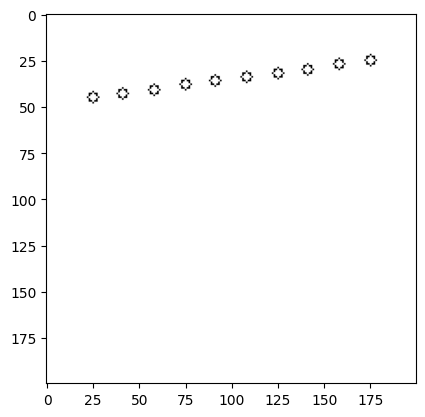

In [244]:
VC.show_gray(image)

In [245]:
shape = (100, 300)
hough_space = np.zeros(shape)
space = np.linspace(0, np.pi, len(hough_space))
d_max = len(hough_space[0]) // 2

In [246]:
%%time
for idx in range(len(idxs)):
    p = (xs[idx], ys[idx])
    for i in range(len(space)):
        theta = space[i]
        d = int(p[0] * np.sin(theta) + p[1] * np.cos(theta)) #+ d_max
        if (d >= d_max * 2) : continue
        hough_space[i, d] += 3

CPU times: user 4.08 ms, sys: 591 µs, total: 4.67 ms
Wall time: 4.14 ms


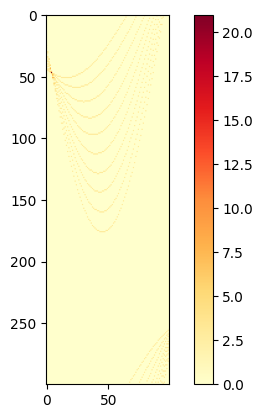

In [247]:
plt.imshow(hough_space.T, cmap=mpl.colormaps["YlOrRd"])
plt.colorbar()

In [248]:
hough_space.shape

(100, 300)

In [249]:
counts, pixel_intensity = np.histogram(
    hough_space.ravel()
)

In [250]:
find_peak_hough_space = hough_space.copy()

In [251]:
xmax, ymax = np.where(find_peak_hough_space > 10)

In [252]:
max_points_hough = []
for xm, ym in zip(xmax, ymax):
    max_points_hough.append((xm,ym))

In [253]:
max_points_hough

[(4, 47)]

In [254]:
maxpoint = max_points_hough[0]

In [255]:
thm = space[maxpoint[0]]
dm = maxpoint[1]

In [256]:
dm

47

In [257]:
math.degrees(thm)

7.272727272727273

In [258]:
xx = np.uint16(np.linspace(0,200,30))
yy = np.uint16((dm - xx*np.sin(thm)) / np.cos(thm))

In [259]:
image = np.zeros((200, 200))
radius_circle = 3
#image[line(45, 25, 25, 175)] = 255
for idx in range(len(idxs)):
    cv2.circle(image, (xs[idx], ys[idx]), color=(255, 0, 0), radius = radius_circle, thickness=1)
for xxx,yyy in zip(xx,yy):
    cv2.circle(image, (xxx, yyy), color=(255, 255, 255), radius = 1, thickness=1)

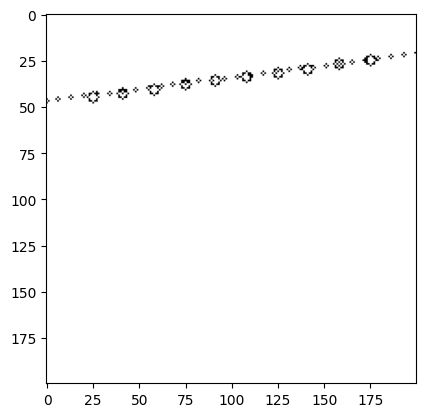

In [260]:
VC.show_gray(image)